In [76]:
import pandas as pd
raw = pd.read_csv('../input/train.csv', nrows=5000000)
raw.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


In [80]:
raw = raw.drop(['click_time', 'attributed_time'], axis=1)
raw.head()

,ip,app,device,os,channel,is_attributed
0,83230,3,1,13,379,0
1,17357,3,1,19,379,0
2,35810,3,1,13,379,0
3,45745,14,1,13,478,0
4,161007,3,1,13,379,0


In [81]:
raw['is_attributed'].value_counts()

0    4991046
1       8954
Name: is_attributed, dtype: int64

In [82]:
raw.isnull().sum()

ip               0
app              0
device           0
os               0
channel          0
is_attributed    0
dtype: int64

In [83]:
raw.columns.values

array(['ip', 'app', 'device', 'os', 'channel', 'is_attributed'], dtype=object)

In [84]:
features = raw.columns.values.tolist()[0:5]
features

['ip', 'app', 'device', 'os', 'channel']

In [86]:
X = raw[features]
y = raw['is_attributed']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)

In [88]:
X_train.shape

(4000000, 5)

In [89]:
y_train.value_counts()

0    3992863
1       7137
Name: is_attributed, dtype: int64

In [90]:
X_test.shape

(1000000, 5)

In [91]:
y_test.value_counts()

0    998183
1      1817
Name: is_attributed, dtype: int64

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf = RandomForestClassifier(max_depth=20, random_state=2018)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

In [94]:
y_pred = rf.predict(X_test)

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[997752,    431],
       [  1323,    494]])

In [96]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    998183
          1       0.53      0.27      0.36      1817

avg / total       1.00      1.00      1.00   1000000



In [97]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

0.63572246765769125

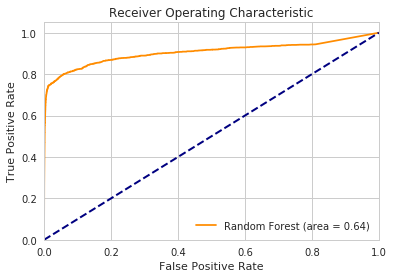

In [99]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [100]:
unseen_data = pd.read_csv('../input/test.csv')
unseen_data.shape

(18790469, 7)

In [101]:
unseen_data.head()

,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


In [102]:
unseen_data.drop(['click_time'], axis=1, inplace=True)
unseen_data.head()

,click_id,ip,app,device,os,channel
0,0,5744,9,1,3,107
1,1,119901,9,1,3,466
2,2,72287,21,1,19,128
3,3,78477,15,1,13,111
4,4,123080,12,1,13,328


In [103]:
unseen_data[features].isnull().sum()

ip         0
app        0
device     0
os         0
channel    0
dtype: int64

In [105]:
unseen_data_pred = rf.predict(unseen_data[features])
unseen_data_pred

array([0, 0, 0, ..., 0, 0, 0])

In [112]:
submission = pd.concat([unseen_data['click_id'], pd.Series(unseen_data_pred, name='is_attributed')], axis=1)
submission.head()

,click_id,is_attributed
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [113]:
submission.shape

(18790469, 2)

In [115]:
submission.to_csv('submission.csv', index=False)